# 데이터분석 , 데이터 전처리

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import seaborn as sns

train = pd.read_csv("C:/Users/admin/Downloads/daegutemp_train3yrs.CSV")      
test = pd.read_csv("C:/Users/admin/Downloads/daegutemp_test.CSV")

train.head()

,date,loc,avr_temp,min_temp,max_temp
0,2017-01-01,143,3.4,-2.0,10.0
1,2017-01-02,143,5.3,-0.4,12.3
2,2017-01-03,143,5.2,0.9,10.9
3,2017-01-04,143,3.9,-1.9,11.2
4,2017-01-05,143,3.4,-1.6,7.6


In [2]:
test.head()

,date,loc,avr_temp,min_temp,max_temp
0,2021-01-01,143,-1.8,-5.7,2.6
1,2021-01-02,143,-0.9,-3.7,2.1
2,2021-01-03,143,-1.3,-4.1,2.1
3,2021-01-04,143,-0.3,-5.8,5.5
4,2021-01-05,143,-1.1,-5.1,2.6


In [27]:
train.isna().sum() #결측치 갯수 체크

date        0
loc         0
avr_temp    1
min_temp    0
max_temp    0
dtype: int64

In [29]:
#결측치를 NaN 직전 행의 값으로 바꿔줌
train['avr_temp'].fillna(method = 'ffill', inplace=True )
train.isna().sum()

date        0
loc         0
avr_temp    0
min_temp    0
max_temp    0
dtype: int64

In [5]:
train.head()

,date,loc,avr_temp,min_temp,max_temp
0,2017-01-01,143,3.4,-2.0,10.0
1,2017-01-02,143,5.3,-0.4,12.3
2,2017-01-03,143,5.2,0.9,10.9
3,2017-01-04,143,3.9,-1.9,11.2
4,2017-01-05,143,3.4,-1.6,7.6


In [6]:
test.isna().sum() #결측치 갯수 체크

date        0
loc         0
avr_temp    0
min_temp    0
max_temp    0
dtype: int64

In [7]:
train.describe()

,loc,avr_temp,min_temp,max_temp
count,1462.0,1462.000000,1462.000000,1462.000000
mean,143.0,14.508892,9.620383,20.040424
std,0.0,9.632459,9.900311,9.795483
min,143.0,-9.400000,-13.900000,-6.100000
25%,143.0,6.100000,1.000000,11.725000
50%,143.0,15.200000,9.500000,21.000000
75%,143.0,22.500000,18.200000,28.200000
max,143.0,33.100000,28.600000,39.200000


In [8]:
test.describe()

,loc,avr_temp,min_temp,max_temp
count,90.0,90.000000,90.000000,90.000000
mean,143.0,5.188889,-0.047778,11.021111
std,0.0,6.051213,5.739460,6.839221
min,143.0,-10.400000,-13.600000,-5.800000
25%,143.0,0.525000,-4.250000,6.425000
50%,143.0,5.900000,0.700000,11.500000
75%,143.0,9.225000,4.225000,16.075000
max,143.0,15.800000,11.700000,24.400000


In [9]:
train.dtypes

date         object
loc           int64
avr_temp    float64
min_temp    float64
max_temp    float64
dtype: object

In [10]:
test.dtypes

date         object
loc           int64
avr_temp    float64
min_temp    float64
max_temp    float64
dtype: object

In [11]:
print(train.shape)
print(test.shape)

(1462, 5)
(90, 5)


<AxesSubplot:xlabel='avr_temp'>

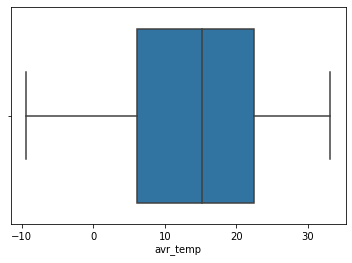

In [12]:
sns.boxplot(x=train['avr_temp'])

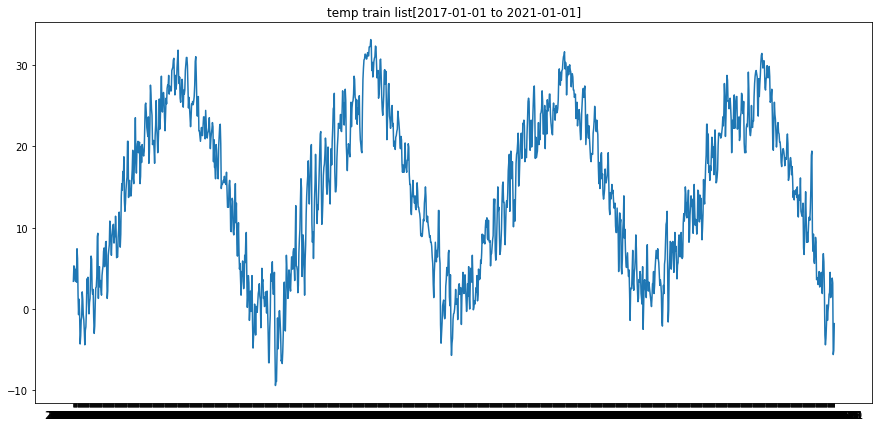

In [13]:
plt.figure(figsize=(15,7))
plt.title('temp train list[2017-01-01 to 2021-01-01]')

plt.plot (train['date'], train['avr_temp'])
plt.show();

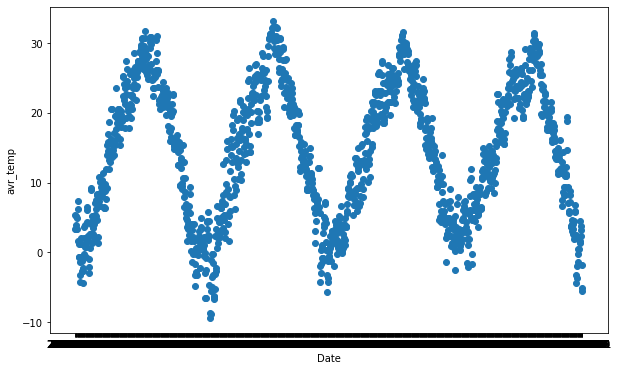

In [14]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train['date'], train['avr_temp'])
ax.set_xlabel('Date')
ax.set_ylabel('avr_temp')
plt.show()

# Time Series Forecasting을 위한 데이터 변환

In [15]:
#avr_temp 행을 번호로 선택
temp_train = train.iloc[:,2:3]
temp_test = test.iloc[:,2:3]

In [16]:
#값을 0과 1 사이로 Scaling 
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
temp_train= ss.fit_transform(temp_train)
temp_test= ss.fit_transform(temp_test)

In [17]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
look_back = 1
trainX, trainY = create_dataset(temp_train, look_back)
testX, testY = create_dataset(temp_test, look_back)

In [19]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

# 데이터훈련

In [20]:
# create and fit the LSTM network
#케라스로 sequential 순차모델 생성
model_temp = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_temp.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True))
model_temp.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True))
model_temp.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 50))
model_temp.add(Dropout(0.2))
# Adding the output layer
model_temp.add(Dense(units = 1))

# Compiling the RNN
model_temp.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
#학습을 시키는 fit 함수. 
#trainX : 입력값, trainY: 입력된 값들이 실제 출력되기를 바라는 값, epochs: 학습시키는 크기, batch_size: 학습시킬때 묶음. 샘플의 수
#이 훈련에서는 32 묶음 씩 100번을 학습시킴
model_temp.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
46/46 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.0000e+00
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.0012
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.0021
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 6.3525e-04
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 6.2612e-04
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.0010
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 4.7076e-04
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.0026
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.0012
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 

# 예측 및 그래프 그리기

In [21]:
prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
temp_test = ss.inverse_transform(temp_test)

In [38]:
print(len(prediction))
print(len(temp_test))

88
90


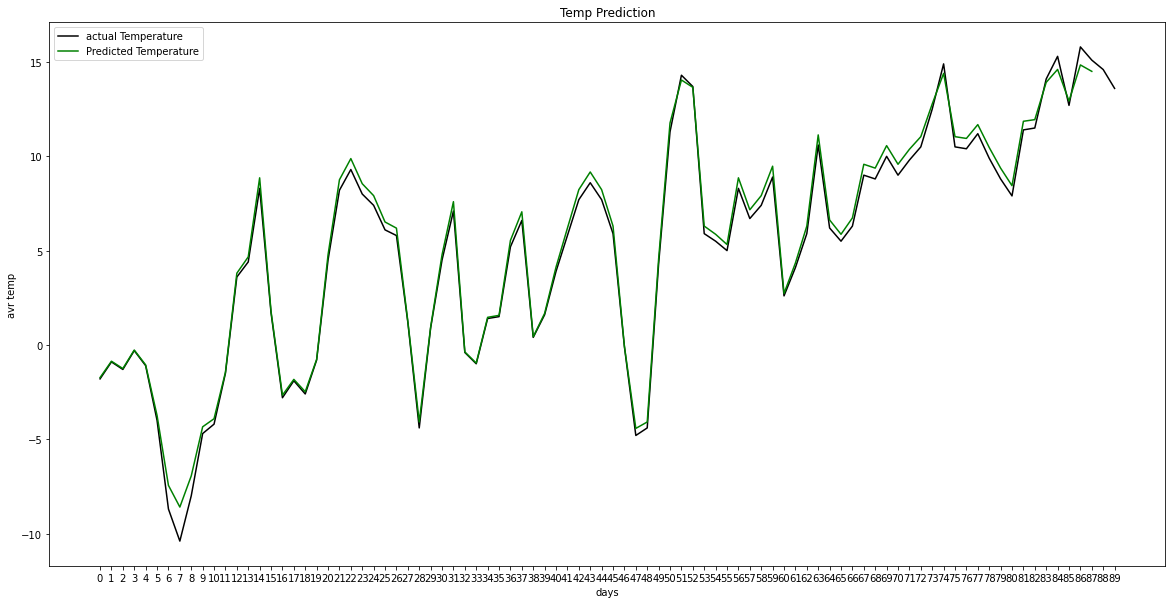

In [34]:
plt.figure(figsize=(20,10))
idx_list = list(range(len(test)))
plt.xticks(idx_list)

plt.plot(temp_test, color = 'black', label = 'actual Temperature')
plt.plot(prediction, color = 'green', label = 'Predicted Temperature')
plt.title('Temp Prediction')
plt.xlabel('days')
plt.ylabel('avr temp')


plt.legend()
plt.show()